# Importing necessary libraries

In [47]:
# importing necessary libraries into the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import scipy.stats as stats
import re
import warnings
warnings.filterwarnings("ignore")

# Data Preparation
## Import the Merged Dataset

In [48]:
#loading the dataset into the dataframes
old_results = pd.read_csv("unclean_results.csv")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

### Check if the data was successfully loaded or not

In [49]:
old_results.head()

,season,round,driverId,driverName,constructorId,constructorName_x,number,position,positionText,points,grid,laps,status,time_x,fastestLapRank,fastestLap_lap,fastestLapTime,averageSpeed,raceName,circuitId,circuitName_x,date,time_y,firstPractice,secondPractice,thirdPractice,qualifying,sprint,race_url,circuitName_y,lat,long,locality,country,url_y,givenName,familyName,code,permanentNumber,dateOfBirth,nationality_x,url_x,constructorName_y,nationality_y,url_y.1,driverExperience,teamStrength
0,2009,1,button,Jenson Button,brawn,Brawn,22.0,1,1,10.0,1,58,Finished,1:34:15.784,3.0,17.0,1:28.020,216.891,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson,Button,BUT,22.0,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,9,12.696735
1,2009,1,barrichello,Rubens Barrichello,brawn,Brawn,23.0,2,2,8.0,2,58,Finished,+0.807,14.0,43.0,1:29.066,214.344,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Rubens,Barrichello,BAR,NaN,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,16,1.000000
2,2009,1,trulli,Jarno Trulli,toyota,Toyota,9.0,3,3,6.0,20,58,Finished,+1.604,10.0,50.0,1:28.916,214.706,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jarno,Trulli,TRU,NaN,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,12,11.711382
3,2009,1,glock,Timo Glock,toyota,Toyota,10.0,4,4,5.0,19,58,Finished,+4.435,6.0,53.0,1:28.416,215.920,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Timo,Glock,GLO,NaN,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,5,11.676113
4,2009,1,alonso,Fernando Alonso,renault,Renault,7.0,5,5,4.0,10,58,Finished,+4.879,9.0,53.0,1:28.712,215.199,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Fernando,Alonso,ALO,14.0,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,8,10.515723


# Pre-processing 

### Check for null values

In [50]:
old_results.isnull().sum()

season                  0
round                   0
driverId                0
driverName              0
constructorId           0
constructorName_x       0
number                  0
position                0
positionText            0
points                  0
grid                    0
laps                    0
status                  0
time_x               2705
fastestLapRank        206
fastestLap_lap        206
fastestLapTime        206
averageSpeed          206
raceName                0
circuitId               0
circuitName_x           0
date                    0
time_y                  0
firstPractice        4384
secondPractice       4384
thirdPractice        4744
qualifying           4384
sprint               5823
race_url                0
circuitName_y           0
lat                     0
long                    0
locality                0
country                 0
url_y                   0
givenName               0
familyName              0
code                    0
permanentNum

### Check the information and stats overview of the data

In [51]:
# loading information and description from the dataset
old_results.info()
old_results.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             6183 non-null   int64  
 1   round              6183 non-null   int64  
 2   driverId           6183 non-null   object 
 3   driverName         6183 non-null   object 
 4   constructorId      6183 non-null   object 
 5   constructorName_x  6183 non-null   object 
 6   number             6183 non-null   float64
 7   position           6183 non-null   int64  
 8   positionText       6183 non-null   object 
 9   points             6183 non-null   float64
 10  grid               6183 non-null   int64  
 11  laps               6183 non-null   int64  
 12  status             6183 non-null   object 
 13  time_x             3478 non-null   object 
 14  fastestLapRank     5977 non-null   float64
 15  fastestLap_lap     5977 non-null   float64
 16  fastestLapTime     5977 

,season,round,number,position,points,grid,laps,fastestLapRank,fastestLap_lap,averageSpeed,lat,long,permanentNumber,driverExperience,teamStrength
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,5977.000000,5977.000000,5977.000000,6183.000000,6183.000000,5551.000000,6183.000000,6183.000000
mean,2016.990296,10.666828,22.554262,10.274139,5.089439,10.184053,54.769206,10.067760,45.788690,204.534658,30.620466,24.898498,27.089714,6.158499,10.812636
std,4.609279,5.957518,22.014978,5.724314,7.188073,5.787940,16.264295,5.617486,14.764869,21.199121,23.207117,64.664250,24.474143,5.244132,2.702927
min,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,100.615000,-37.849700,-115.173000,2.000000,0.000000,1.000000
25%,2013.000000,6.000000,8.000000,5.000000,0.000000,5.000000,52.000000,5.000000,39.000000,192.951000,24.467200,2.261110,9.000000,2.000000,8.688865
50%,2017.000000,11.000000,16.000000,10.000000,1.000000,10.000000,56.000000,10.000000,48.000000,204.670000,40.372500,11.716700,20.000000,5.000000,10.572000
75%,2021.000000,16.000000,27.000000,15.000000,8.000000,15.000000,66.000000,15.000000,55.000000,218.737000,45.615600,54.603100,33.000000,9.000000,12.891141
max,2024.000000,24.000000,99.000000,20.000000,50.000000,20.000000,87.000000,23.000000,85.000000,256.100000,52.388800,144.968000,99.000000,23.000000,19.826923


## Convert the columns "dateOfBirth" and "date" to datetime datatype and create a new column "driverAge" as the time elapsed between date of birth and the race date.

### Convert the columns "dateOfBirth" and "date" to datetime datatype.

In [52]:
#converting "dateOfBirth" and "date" into datetime datatype
old_results['date'] = pd.to_datetime(old_results['date'])
old_results['dateOfBirth'] = pd.to_datetime(old_results['dateOfBirth'])

### Create a new column "driverAge" as the time elapsed between date of birth and the race date.

In [53]:
#creating new column "driverAge"
old_results['driverAge'] = (
    (old_results['date'] - old_results['dateOfBirth']).dt.days / 365.25).astype(int)

In [54]:
old_results.head()

,season,round,driverId,driverName,constructorId,constructorName_x,number,position,positionText,points,grid,laps,status,time_x,fastestLapRank,fastestLap_lap,fastestLapTime,averageSpeed,raceName,circuitId,circuitName_x,date,time_y,firstPractice,secondPractice,thirdPractice,qualifying,sprint,race_url,circuitName_y,lat,long,locality,country,url_y,givenName,familyName,code,permanentNumber,dateOfBirth,nationality_x,url_x,constructorName_y,nationality_y,url_y.1,driverExperience,teamStrength,driverAge
0,2009,1,button,Jenson Button,brawn,Brawn,22.0,1,1,10.0,1,58,Finished,1:34:15.784,3.0,17.0,1:28.020,216.891,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson,Button,BUT,22.0,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,9,12.696735,29
1,2009,1,barrichello,Rubens Barrichello,brawn,Brawn,23.0,2,2,8.0,2,58,Finished,+0.807,14.0,43.0,1:29.066,214.344,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Rubens,Barrichello,BAR,NaN,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,16,1.000000,36
2,2009,1,trulli,Jarno Trulli,toyota,Toyota,9.0,3,3,6.0,20,58,Finished,+1.604,10.0,50.0,1:28.916,214.706,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jarno,Trulli,TRU,NaN,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,12,11.711382,34
3,2009,1,glock,Timo Glock,toyota,Toyota,10.0,4,4,5.0,19,58,Finished,+4.435,6.0,53.0,1:28.416,215.920,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Timo,Glock,GLO,NaN,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,5,11.676113,27
4,2009,1,alonso,Fernando Alonso,renault,Renault,7.0,5,5,4.0,10,58,Finished,+4.879,9.0,53.0,1:28.712,215.199,Australian Grand Prix,albert_park,Albert Park Grand Prix Circuit,2009-03-29,06:00:00Z,NaN,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/2009_Australian_G...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Fernando,Alonso,ALO,14.0,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,8,10.515723,27


## Data Cleaning
### Drop irrelevent columns

In [55]:
#checking columns before dropping irrelevent ones
old_results.columns

Index(['season', 'round', 'driverId', 'driverName', 'constructorId',
       'constructorName_x', 'number', 'position', 'positionText', 'points',
       'grid', 'laps', 'status', 'time_x', 'fastestLapRank', 'fastestLap_lap',
       'fastestLapTime', 'averageSpeed', 'raceName', 'circuitId',
       'circuitName_x', 'date', 'time_y', 'firstPractice', 'secondPractice',
       'thirdPractice', 'qualifying', 'sprint', 'race_url', 'circuitName_y',
       'lat', 'long', 'locality', 'country', 'url_y', 'givenName',
       'familyName', 'code', 'permanentNumber', 'dateOfBirth', 'nationality_x',
       'url_x', 'constructorName_y', 'nationality_y', 'url_y.1',
       'driverExperience', 'teamStrength', 'driverAge'],
      dtype='object')

### Renaming columns

In [56]:
# renaming column constructorName_x, time_x, circuitName_x, and nationality_x to constructorName, time, circuitName, and nationality.
old_results = old_results.rename(columns={"constructorName_x": "constructorName", "time_x": "time", "circuitName_x": "circuitName", "nationality_x": "nationality"})

In [57]:
# checking if the renaming was successful
old_results.columns

Index(['season', 'round', 'driverId', 'driverName', 'constructorId',
       'constructorName', 'number', 'position', 'positionText', 'points',
       'grid', 'laps', 'status', 'time', 'fastestLapRank', 'fastestLap_lap',
       'fastestLapTime', 'averageSpeed', 'raceName', 'circuitId',
       'circuitName', 'date', 'time_y', 'firstPractice', 'secondPractice',
       'thirdPractice', 'qualifying', 'sprint', 'race_url', 'circuitName_y',
       'lat', 'long', 'locality', 'country', 'url_y', 'givenName',
       'familyName', 'code', 'permanentNumber', 'dateOfBirth', 'nationality',
       'url_x', 'constructorName_y', 'nationality_y', 'url_y.1',
       'driverExperience', 'teamStrength', 'driverAge'],
      dtype='object')

### Dropping irrelevent columns permanently

In [58]:
#dropping irrelevent columns permanently
old_results.drop(columns = ['positionText', 'points', 'laps', 'status', 'fastestLapRank',
       'fastestLap_lap', 'fastestLapTime', 'averageSpeed', 'time_y', 'firstPractice', 
       'secondPractice', 'thirdPractice', 'qualifying', 'sprint', 'race_url', 'circuitName_y',
       'permanentNumber', 'url_y', 'givenName', 'familyName','url_x', 'constructorName_y',
       'nationality_y', 'url_y.1'], axis = 1, inplace = True)

In [59]:
# checking if the columns were dropped successfully
old_results.columns

Index(['season', 'round', 'driverId', 'driverName', 'constructorId',
       'constructorName', 'number', 'position', 'grid', 'time', 'raceName',
       'circuitId', 'circuitName', 'date', 'lat', 'long', 'locality',
       'country', 'code', 'dateOfBirth', 'nationality', 'driverExperience',
       'teamStrength', 'driverAge'],
      dtype='object')

### Create the CSV for result interpretation. 

In [60]:
# saving a copy of dataframe 'old_reasults' as 'old_results_ref'
old_results_ref = old_results.copy()

# creating a new csv 'old_results_reference' which will be later used for result presentation
old_results_ref.to_csv("old_results_reference.csv", index=False)

# Exploratory Data Analysis (EDA)

In [61]:
# checking the number of rows and columns in the dataframe
old_results.shape

(6183, 24)

In [62]:
# checking the types of data in the dataframe
old_results.dtypes

season                       int64
round                        int64
driverId                    object
driverName                  object
constructorId               object
constructorName             object
number                     float64
position                     int64
grid                         int64
time                        object
raceName                    object
circuitId                   object
circuitName                 object
date                datetime64[ns]
lat                        float64
long                       float64
locality                    object
country                     object
code                        object
dateOfBirth         datetime64[ns]
nationality                 object
driverExperience             int64
teamStrength               float64
driverAge                    int64
dtype: object

In [63]:
# separating columns by categorical and numerical order
numerical_cols = old_results.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = old_results.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

(Index(['season', 'round', 'number', 'position', 'grid', 'lat', 'long',
        'driverExperience', 'teamStrength', 'driverAge'],
       dtype='object'),
 Index(['driverId', 'driverName', 'constructorId', 'constructorName', 'time',
        'raceName', 'circuitId', 'circuitName', 'locality', 'country', 'code',
        'nationality'],
       dtype='object'))

In [64]:
# checking for null values (if there are any)
old_results.isnull().sum()[old_results.isnull().sum() > 0]

time    2705
dtype: int64

In [65]:
# checking the statistical overview of the data
old_results.describe()

,season,round,number,position,grid,date,lat,long,dateOfBirth,driverExperience,teamStrength,driverAge
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183,6183.000000,6183.000000,6183,6183.000000,6183.000000,6183.000000
mean,2016.990296,10.666828,22.554262,10.274139,10.184053,2017-07-24 22:59:26.812227072,30.620466,24.898498,1989-06-15 17:19:11.091703168,6.158499,10.812636,27.603752
min,2009.000000,1.000000,1.000000,1.000000,0.000000,2009-03-29 00:00:00,-37.849700,-115.173000,1969-01-03 00:00:00,0.000000,1.000000,17.000000
25%,2013.000000,6.000000,8.000000,5.000000,5.000000,2013-09-08 00:00:00,24.467200,2.261110,1985-01-07 00:00:00,2.000000,8.688865,24.000000
50%,2017.000000,11.000000,16.000000,10.000000,10.000000,2017-10-01 00:00:00,40.372500,11.716700,1989-08-28 00:00:00,5.000000,10.572000,27.000000
75%,2021.000000,16.000000,27.000000,15.000000,15.000000,2021-09-05 00:00:00,45.615600,54.603100,1995-06-29 00:00:00,9.000000,12.891141,31.000000
max,2024.000000,24.000000,99.000000,20.000000,20.000000,2024-12-08 00:00:00,52.388800,144.968000,2005-05-08 00:00:00,23.000000,19.826923,43.000000
std,4.609279,5.957518,22.014978,5.724314,5.787940,NaN,23.207117,64.664250,NaN,5.244132,2.702927,5.273822


In [66]:
# checking for duplicates in data
old_results.duplicated().sum()

np.int64(0)

In [67]:
# checking for maximum driver's finishing position
old_results['position'].max()

np.int64(20)

In [68]:
# checking for maximum driver's starting position
old_results['grid'].max()

np.int64(20)

In [69]:
# checking for minimum driver's finishing position
old_results['position'].min()

np.int64(1)

In [70]:
# checking for minimum driver's starting position
old_results['grid'].max()

np.int64(20)

## Data Visualisation

## Univariate Plots

### Histogram to illustrate the distribution of finishing positions (1–20)

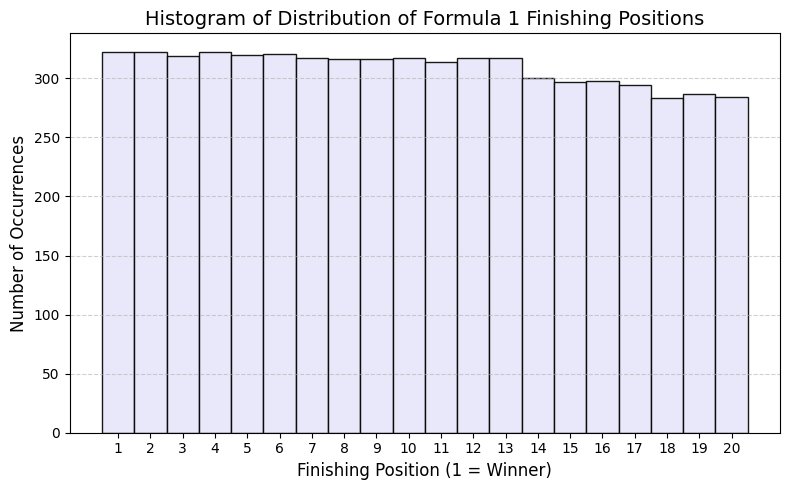

In [72]:
# histogram to illustrate the distribution of finishing positions (1–20)
plt.figure(figsize=(8, 5))
plt.hist(old_results['position'],
    bins=20,
    range=(0.5, 20.5),     # ensures bins align with positions 1–20
    color='lavender',
    edgecolor='black',
    alpha=0.9
)
plt.title('Histogram of Distribution of Formula 1 Finishing Positions', fontsize=14)
plt.xlabel('Finishing Position (1 = Winner)', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(range(1, 21), fontsize=10)  # label positions from 1 to 20
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Bar graph to visually illustrate finishing position frequencies (1–20)

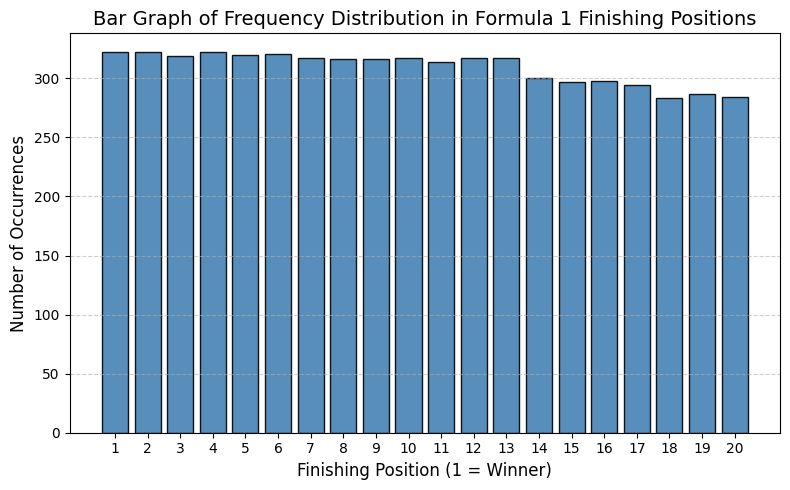

In [73]:
# bar graph to visually illustrate finishing position frequencies (1–20)
position_counts = old_results['position'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(
    position_counts.index,
    position_counts.values,
    color='steelblue',
    edgecolor='black',
    alpha=0.9
)
plt.title('Bar Graph of Frequency Distribution in Formula 1 Finishing Positions', fontsize=14)
plt.xlabel('Finishing Position (1 = Winner)', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(range(1, 21), fontsize=10)  # explicitly label positions 1–20
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Count plot to illustrate the frequency of finishing positions (1–20)

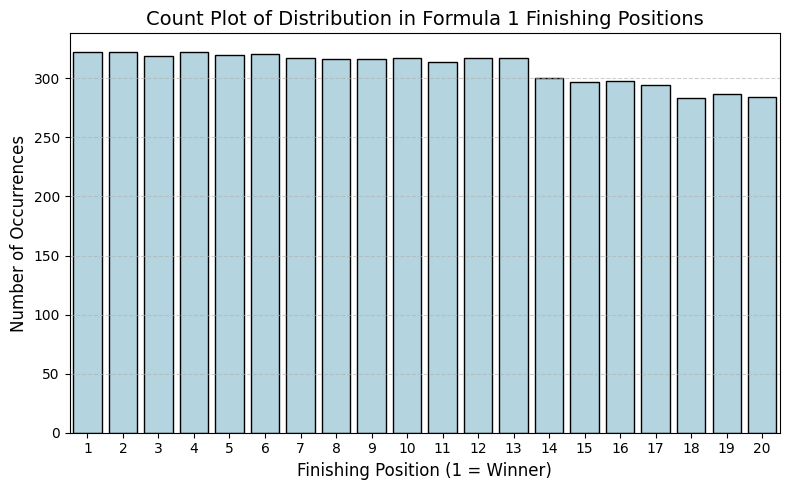

In [74]:
# count plot to illustrate the frequency of finishing positions (1–20)
plt.figure(figsize=(8, 5))
sns.countplot(
    x='position',
    data=old_results,
    order=range(1, 21),
    color='lightblue',
    edgecolor='black'
)
plt.title('Count Plot of Distribution in Formula 1 Finishing Positions', fontsize=14)
plt.xlabel('Finishing Position (1 = Winner)', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(range(0, 20), fontsize=10)  # explicit labels 1–20
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Box plot to illustrate the distribution of finishing positions

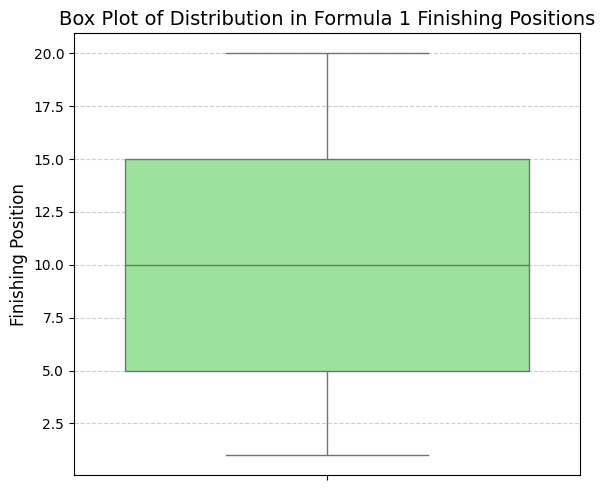

In [75]:
# box plot to illustrate the distribution of finishing positions
plt.figure(figsize=(6, 5))
sns.boxplot(
    y='position',
    data=old_results,
    color='lightgreen'
)
plt.title('Box Plot of Distribution in Formula 1 Finishing Positions', fontsize=14)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Violin plot to illustrate the distribution and density of finishing positions

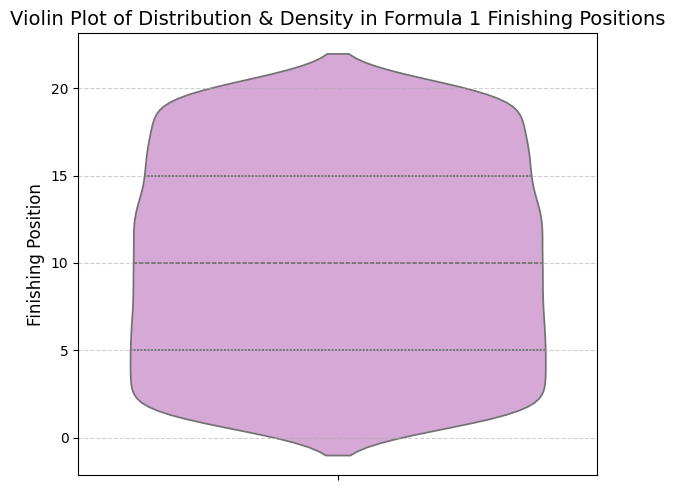

In [76]:
# violin plot to illustrate the distribution and density of finishing positions
plt.figure(figsize=(6, 5))
sns.violinplot(
    y='position',
    data=old_results,
    color='plum',
    inner='quartile'   # shows median and quartiles
)
plt.title('Violin Plot of Distribution & Density in Formula 1 Finishing Positions', fontsize=14)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Bivariate Relationship Plots

### Scatter plot with colour representing grid position

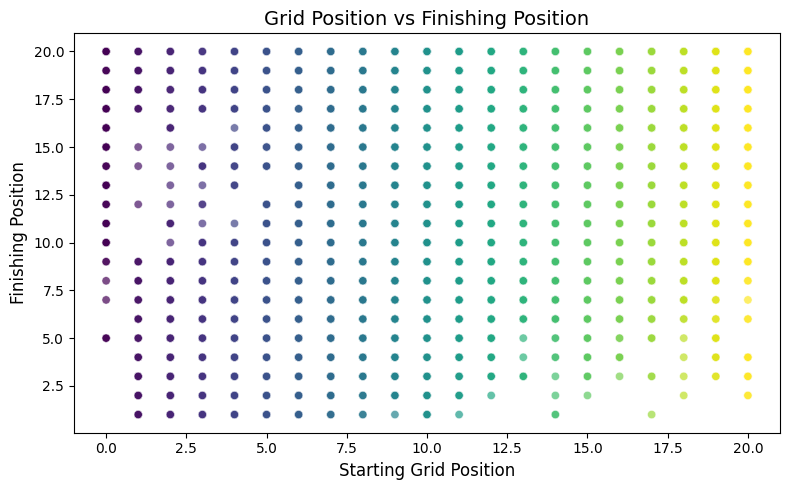

In [77]:
# scatter plot with colour representing grid position
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='grid',
    y='position',
    data=old_results,
    hue='grid',
    palette='viridis',
    alpha=0.7,
    legend=False   # to keep plot clean
)
plt.title('Grid Position vs Finishing Position', fontsize=14)
plt.xlabel('Starting Grid Position', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Scatter plot with colour representing driver experience

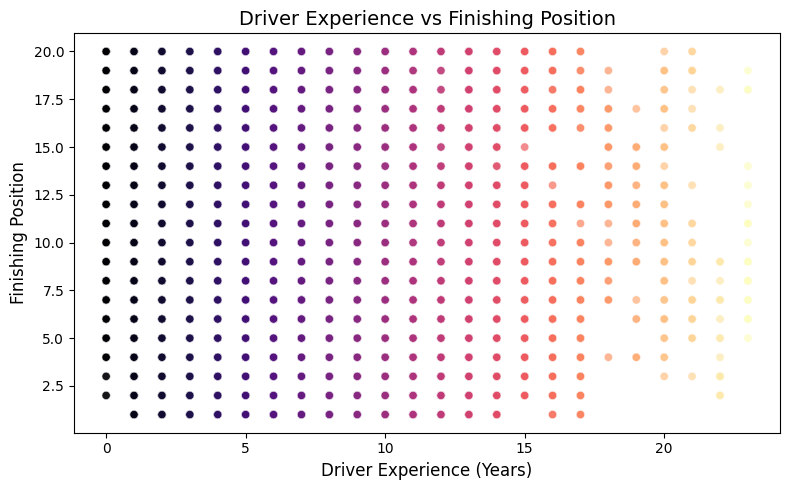

In [78]:
# scatter plot with colour representing driver experience
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='driverExperience',
    y='position',
    data=old_results,
    hue='driverExperience',
    palette='magma',
    alpha=0.7,
    legend=False
)
plt.title('Driver Experience vs Finishing Position', fontsize=14)
plt.xlabel('Driver Experience (Years)', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Scatter plot with colour representing team strength

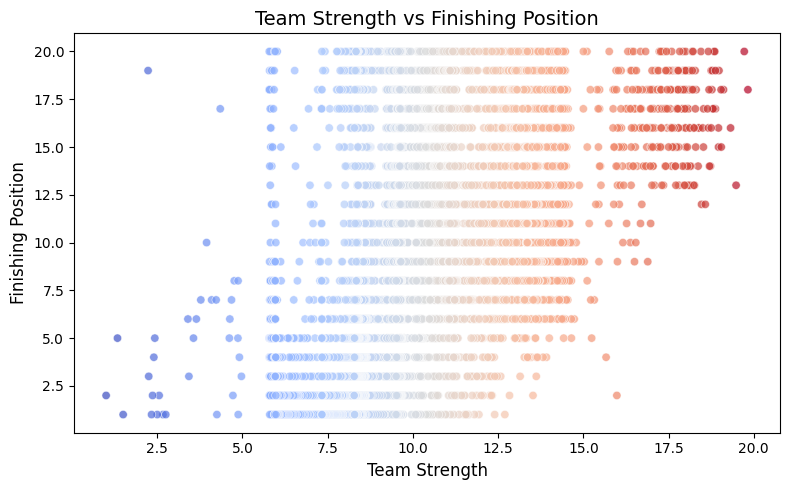

In [79]:
# scatter plot with colour representing team strength
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='teamStrength',
    y='position',
    data=old_results,
    hue='teamStrength',
    palette='coolwarm',
    alpha=0.7,
    legend=False
)
plt.title('Team Strength vs Finishing Position', fontsize=14)
plt.xlabel('Team Strength', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Line graph showing average finishing position by season

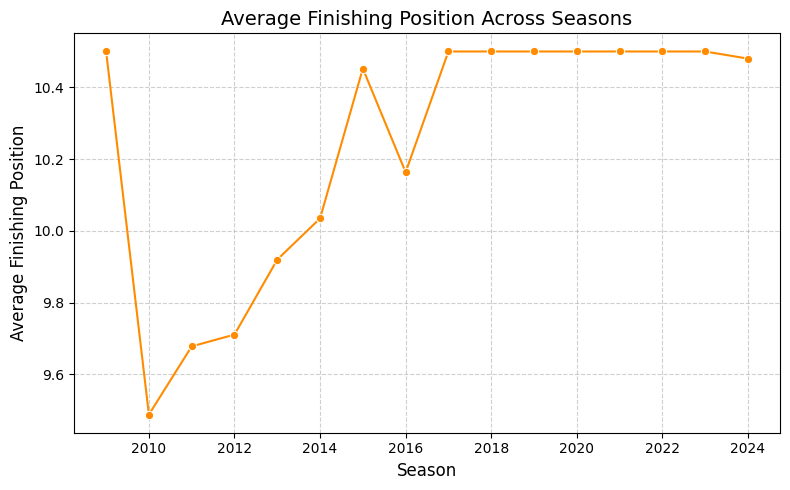

In [80]:
# line plot showing average finishing position by season
season_avg = old_results.groupby('season')['position'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(
    x='season',
    y='position',
    data=season_avg,
    color='darkorange',
    marker='o'
)
plt.title('Average Finishing Position Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regression plot showing relationship between grid position and finishing position

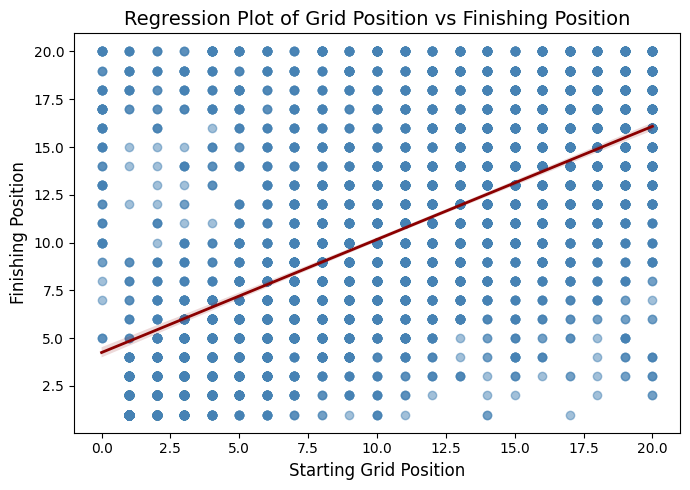

In [81]:
# regression plot showing relationship between grid position and finishing position
plt.figure(figsize=(7, 5))
sns.regplot(
    x='grid',
    y='position',
    data=old_results,
    scatter_kws={
        'color': 'steelblue',
        'alpha': 0.5
    },
    line_kws={
        'color': 'darkred',
        'linewidth': 2
    }
)
plt.title('Regression Plot of Grid Position vs Finishing Position', fontsize=14)
plt.xlabel('Starting Grid Position', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Box plot by category of finishing position by driver experience group

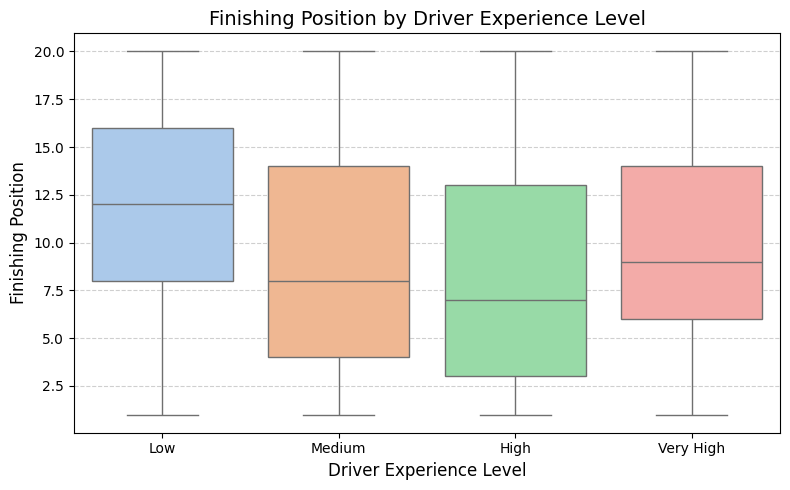

In [82]:
# create experience categories
old_results['experience_group'] = pd.cut(
    old_results['driverExperience'],
    bins=[0, 3, 7, 15, 30],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# box plot of finishing position by driver experience group
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='experience_group',
    y='position',
    data=old_results,
    palette='pastel'
)
plt.title('Finishing Position by Driver Experience Level', fontsize=14)
plt.xlabel('Driver Experience Level', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Grouped box plot illustrating finishing position by starting grid position

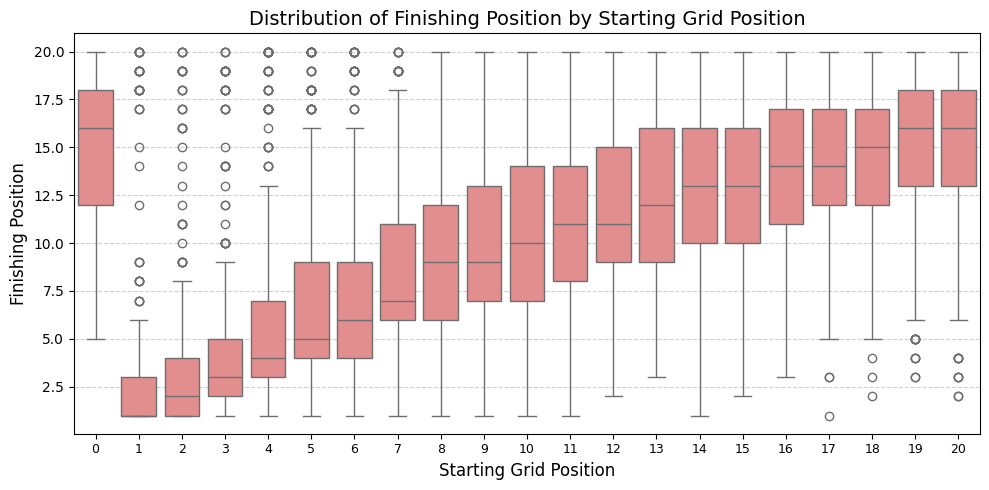

In [83]:
# grouped box plot illustrating finishing position by starting grid position
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='grid',
    y='position',
    data=old_results,
    color='lightcoral'
)
plt.title('Distribution of Finishing Position by Starting Grid Position', fontsize=14)
plt.xlabel('Starting Grid Position', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Multivariate Plots

### Correlation heatmap of numerical features

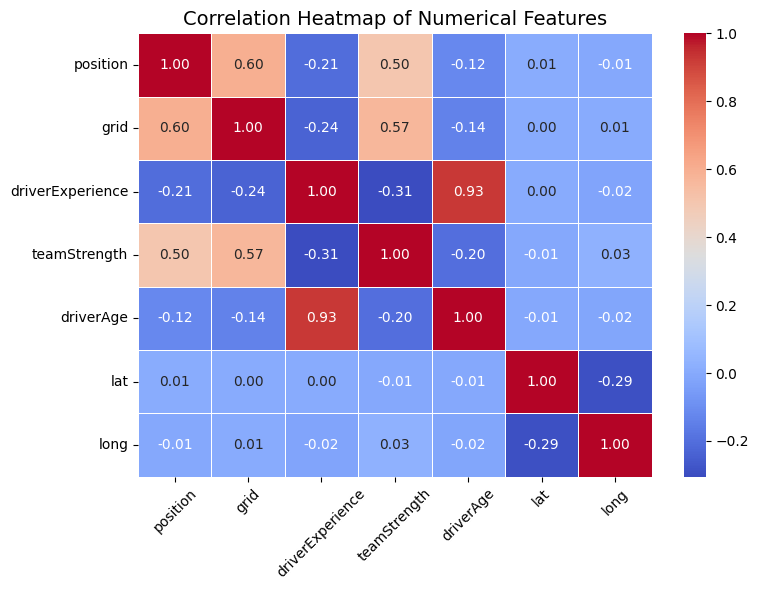

In [84]:
# selecting numerical columns for correlation
corr_features = old_results[[
    'position',
    'grid',
    'driverExperience',
    'teamStrength',
    'driverAge',
    'lat',
    'long'
]]
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_features.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Pair plot of key numerical features

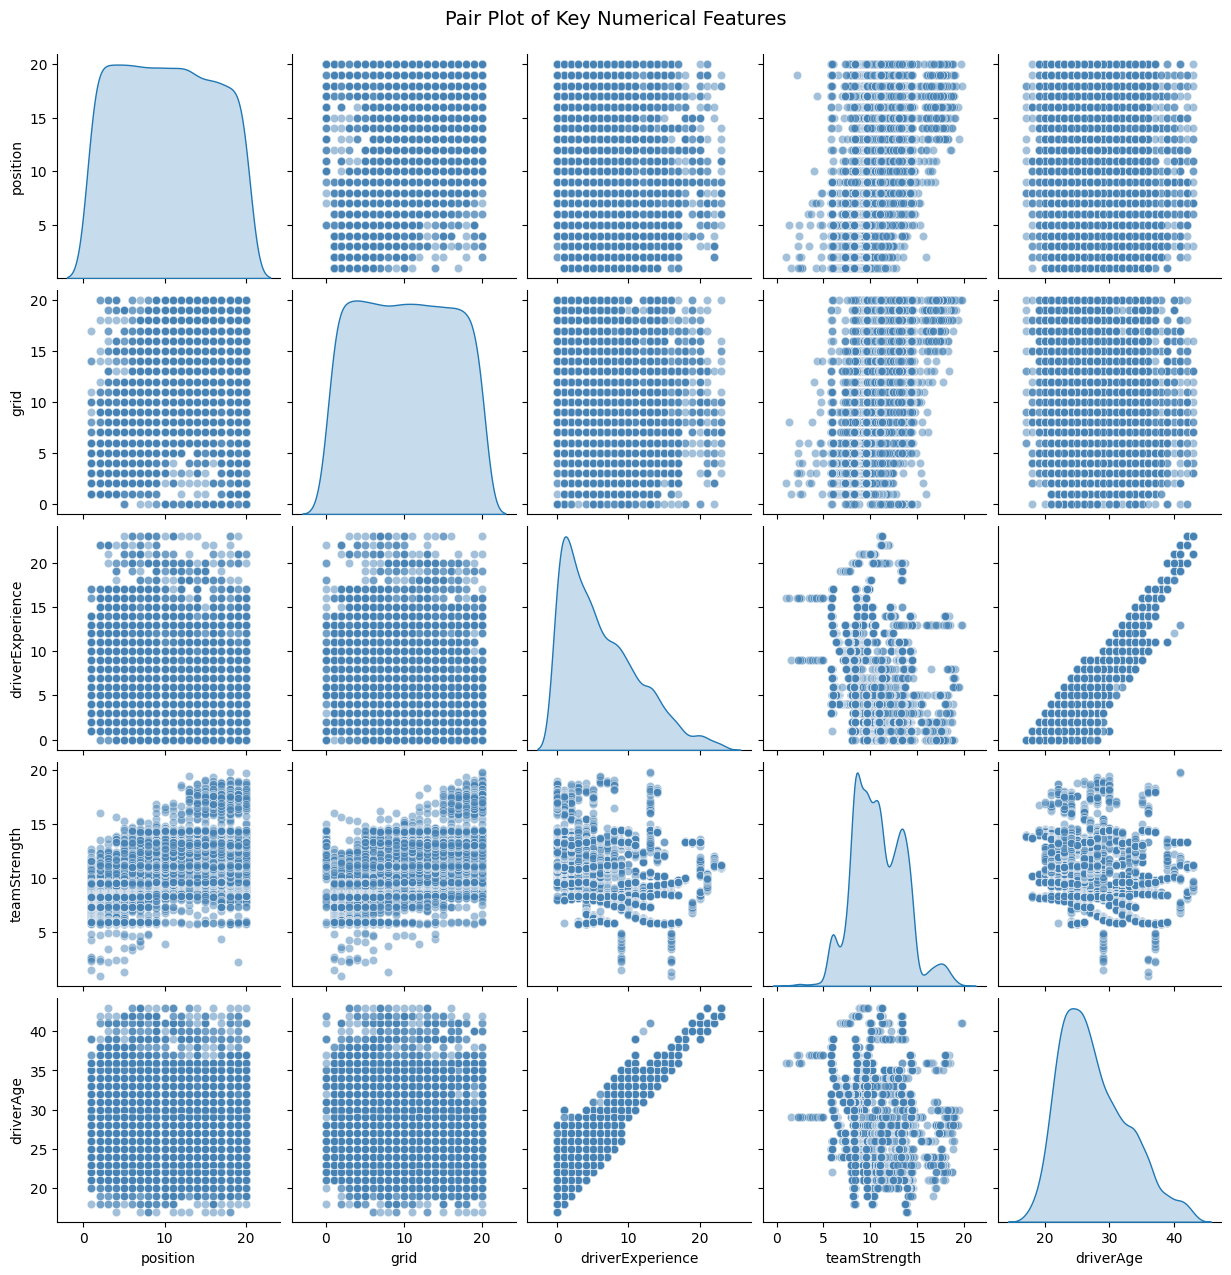

In [85]:
# select key numerical features only
pair_features = old_results[[
    'position',
    'grid',
    'driverExperience',
    'teamStrength',
    'driverAge'
]]

sns.pairplot(
    pair_features,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 'color': 'steelblue'},
    diag_kws={'shade': True}
)

plt.suptitle('Pair Plot of Key Numerical Features', fontsize=14, y=1.02)
plt.show()

### Bubble Plot of Grid vs Finishing Position

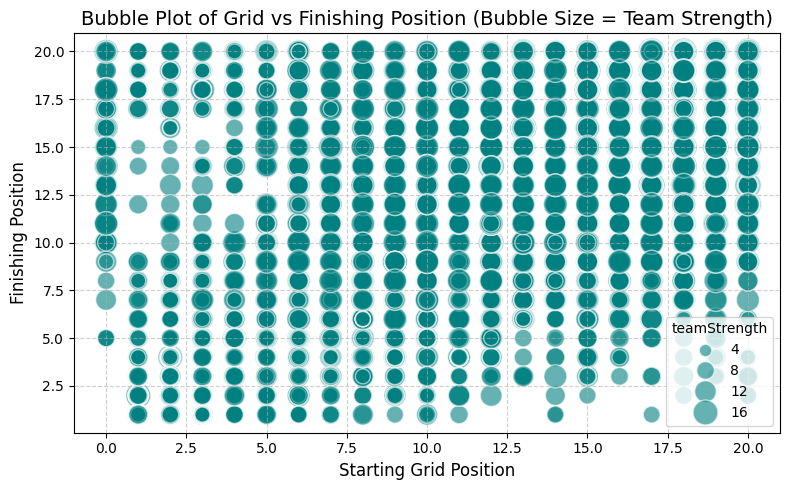

In [86]:
# bubble plot showing grid vs finishing position with team strength as bubble size
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x = 'grid',
    y = 'position',
    data = old_results,
    size = 'teamStrength',          # bubble size
    sizes = (20, 400),              # control bubble scale
    color = 'teal',
    alpha = 0.6,
    legend = True
)

plt.title('Bubble Plot of Grid vs Finishing Position (Bubble Size = Team Strength)', fontsize=14)
plt.xlabel('Starting Grid Position', fontsize = 12)
plt.ylabel('Finishing Position', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Time‑Related Plots

### Time Series Plot of Average Finishing Position Across Seasons

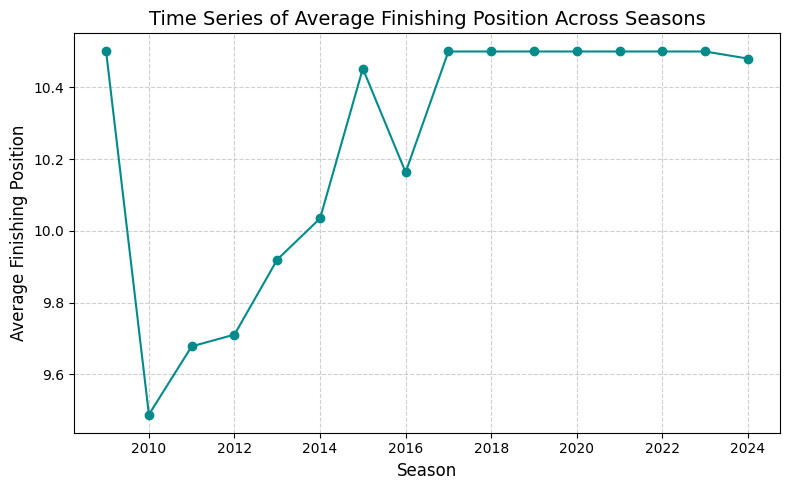

In [87]:
# time series plot of average finishing position per season
season_avg = old_results.groupby('season')['position'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(
    season_avg['season'],
    season_avg['position'],
    marker='o',
    color='darkcyan'
)

plt.title('Time Series of Average Finishing Position Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

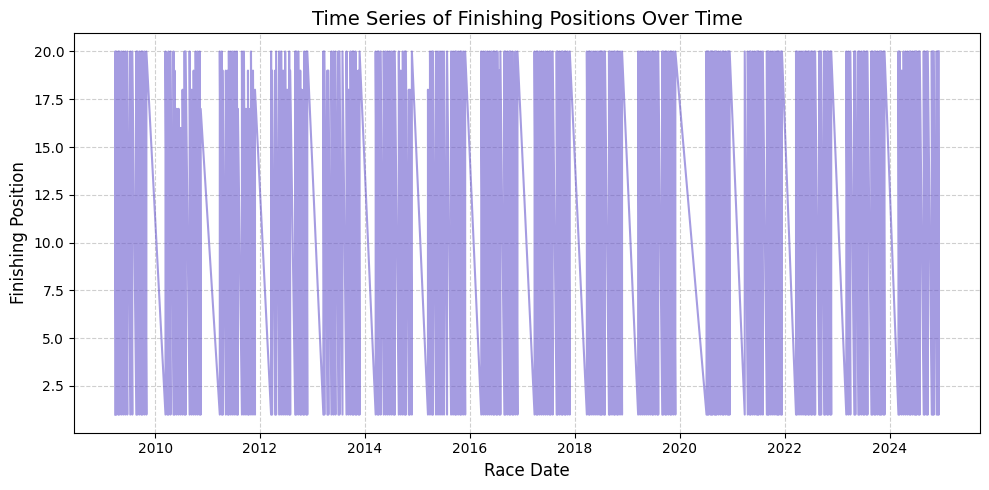

In [90]:
# ensuring date column is datetime
old_results['date'] = pd.to_datetime(old_results['date'])

plt.figure(figsize = (10, 5))
plt.plot(
    old_results['date'],
    old_results['position'],
    color = 'slateblue',
    alpha = 0.6
)

plt.title('Time Series of Finishing Positions Over Time', fontsize=14)
plt.xlabel('Race Date', fontsize = 12)
plt.ylabel('Finishing Position', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

### Trend Plot of Average Finishing Position by Season

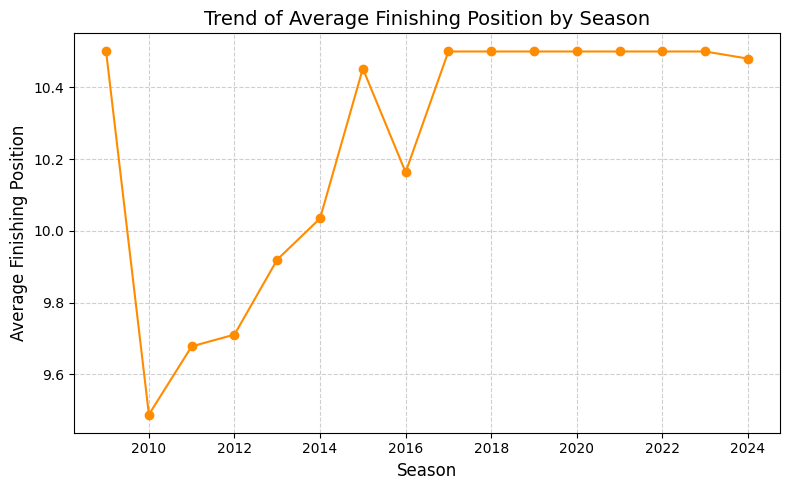

In [91]:
season_avg = old_results.groupby('season')['position'].mean().reset_index()

plt.figure(figsize = (8, 5))
plt.plot(
    season_avg['season'],
    season_avg['position'],
    marker = 'o',
    color = 'darkorange'
)

plt.title('Trend of Average Finishing Position by Season', fontsize=14)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Finishing Position', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Geographic or Spatial Plots

### Latitude-Longitude Scatter Plot of Race Locations

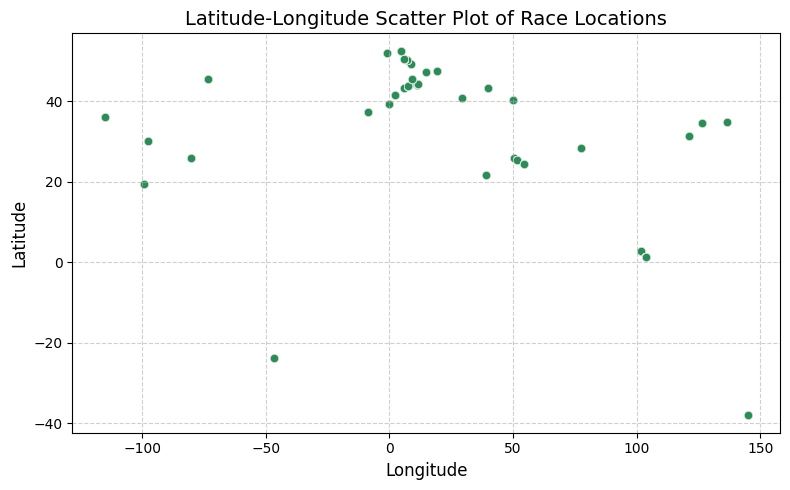

In [92]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x = 'long',
    y = 'lat',
    data = old_results,
    color = 'seagreen',
    alpha = 0.6
)

plt.title('Latitude-Longitude Scatter Plot of Race Locations', fontsize=14)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Distribution Comparison Plot

### Grouped Bar Chart of Average Finishing Position by Driver Experience Level

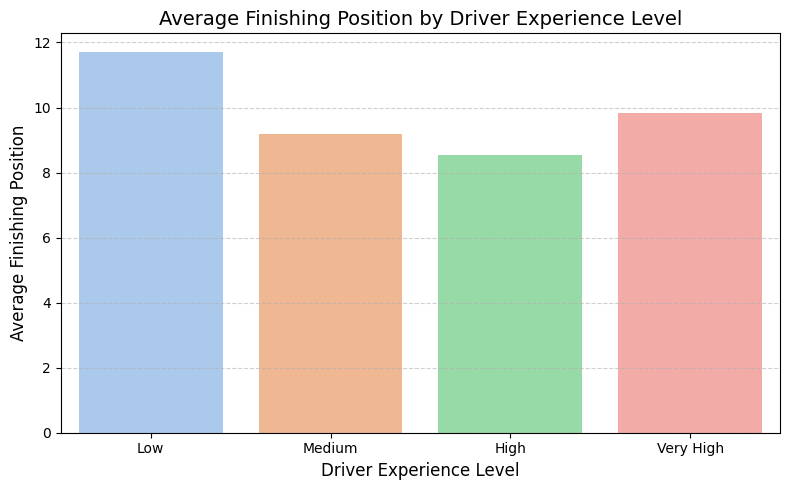

In [98]:
avg_position = old_results.groupby('experience_group')['position'].mean().reset_index()

plt.figure(figsize = (8, 5))
sns.barplot(
    x = 'experience_group',
    y = 'position',
    data = avg_position,
    palette = 'pastel'
)

plt.title('Average Finishing Position by Driver Experience Level', fontsize=14)
plt.xlabel('Driver Experience Level', fontsize = 12)
plt.ylabel('Average Finishing Position', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

# Feature Selection

### Dropping columns that are irrelevent for model training

In [103]:
#dropping irrelevent columns
old_results.drop(columns = ['driverId', 'driverName', 'constructorId',
       'constructorName', 'number', 'time', 'raceName',
       'circuitId', 'circuitName', 'date', 'locality',
       'country', 'code', 'dateOfBirth', 'nationality'], axis = 1, inplace = True)

In [104]:
# checking if the columns were dropped successfully
old_results.columns

Index(['season', 'round', 'position', 'grid', 'lat', 'long',
       'driverExperience', 'teamStrength', 'driverAge', 'experience_group'],
      dtype='object')

### Checking for null values and NaNs

In [105]:
# checking for null values
old_results.isnull().sum()

season                0
round                 0
position              0
grid                  0
lat                   0
long                  0
driverExperience      0
teamStrength          0
driverAge             0
experience_group    658
dtype: int64

In [106]:
# checking for NaNs 
old_results.isna()

,season,round,position,grid,lat,long,driverExperience,teamStrength,driverAge,experience_group
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6178,False,False,False,False,False,False,False,False,False,False
6179,False,False,False,False,False,False,False,False,False,False
6180,False,False,False,False,False,False,False,False,False,False
6181,False,False,False,False,False,False,False,False,False,True


### Checking the unique values from all the columns in the dataframe

In [107]:
#to see the uniques values from all columns

##iterating over each column too see the unique values.
for column in old_results.columns:
    print (column, ":", old_results[column].unique())

season : [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023 2024]
round : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
position : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
grid : [ 1  2 20 19 10  5 13 17 16  9 15  8  3  4  7  6 14 11 12 18  0]
lat : [-37.8497    2.76083  31.3389   26.0325   41.57     43.7347   40.9517
  52.0786   50.3356   47.5789   39.4589   50.4372   45.6156    1.2914
  34.8431  -23.7036   24.4672   45.5      49.3278   34.7333   28.3487
  30.1328   47.2197   43.4057   19.4042   40.3725   43.2506   43.9975
  37.227    44.3439   52.3888   25.49     21.6319   25.9581   36.1147 ]
long : [ 144.968     101.738     121.22       50.5106      2.26111     7.42056
   29.405      -1.01694     6.9475     19.2486     -0.331667    5.97139
    9.28111   103.864     136.541     -46.6997     54.6031    -73.5228
    8.56583   126.417      77.5331    -97.6411     14.7647     39.9578
  -99.0907     49.8533      5.

In [108]:
#to see the number of unique values from all columns
old_results.nunique()

season                16
round                 24
position              20
grid                  21
lat                   35
long                  35
driverExperience      24
teamStrength        5982
driverAge             27
experience_group       4
dtype: int64

### Chhecking information and description of the data after dropping irrelevant columns

In [109]:
# loading information and description from the dataset 
old_results.info()
old_results.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   season            6183 non-null   int64   
 1   round             6183 non-null   int64   
 2   position          6183 non-null   int64   
 3   grid              6183 non-null   int64   
 4   lat               6183 non-null   float64 
 5   long              6183 non-null   float64 
 6   driverExperience  6183 non-null   int64   
 7   teamStrength      6183 non-null   float64 
 8   driverAge         6183 non-null   int64   
 9   experience_group  5525 non-null   category
dtypes: category(1), float64(3), int64(6)
memory usage: 441.1 KB


,season,round,position,grid,lat,long,driverExperience,teamStrength,driverAge
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000
mean,2016.990296,10.666828,10.274139,10.184053,30.620466,24.898498,6.158499,10.812636,27.603752
std,4.609279,5.957518,5.724314,5.787940,23.207117,64.664250,5.244132,2.702927,5.273822
min,2009.000000,1.000000,1.000000,0.000000,-37.849700,-115.173000,0.000000,1.000000,17.000000
25%,2013.000000,6.000000,5.000000,5.000000,24.467200,2.261110,2.000000,8.688865,24.000000
50%,2017.000000,11.000000,10.000000,10.000000,40.372500,11.716700,5.000000,10.572000,27.000000
75%,2021.000000,16.000000,15.000000,15.000000,45.615600,54.603100,9.000000,12.891141,31.000000
max,2024.000000,24.000000,20.000000,20.000000,52.388800,144.968000,23.000000,19.826923,43.000000


## Create new csv with cleaned dataset for model training

In [110]:
old_results.to_csv('results.csv', index=False)